In [19]:
#We are just setting up notebook to have the needed libraries here
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson

plt.rcParams["figure.figsize"] = (10,8)

# Lab 1: Some Basic Statistics

**Thalya Paleologu<br>
12 October 2019**

# Part 1: Investigating the Standard Normal Distribution

In this section we will introduce the concepts of **probability distribution functions**, **cumulative distribution functions**, and **percent point functions** as we consider the Standard Normal distribution.

## 1.1 The Probability Density Function

The Normal, or Gaussian, distribution is a probability distrubtion for a random continuous variable. That is, if a random variable $x$ is normally distributed, then its **probability density function (pdf)** is precisely the normal distribution function $$f(x) = \frac{1}{2 \pi \sigma ^2} e^{-\frac{(x-\mu)^2}{2 \sigma ^2}}$$ where $\mu$ is the average measurement and $\sigma$ is the standard deviation.

The Standard Normal Distribution is the special case where the average is zero and the standard deviation is one: $\mu = 0, \hspace{2mm} \sigma = 1$. Below is a display for the Standard Normal Distribution in blue, and superimposed are normal distributions with higher standard deviations. As the standard deviation increases, the spread of the function increases and the maximum value attained by the function goes down--this results from the fact that all probability density functions have to have $\int_{-\infty}^{\infty} pdf(x) \hspace{2mm} dx = 1$.


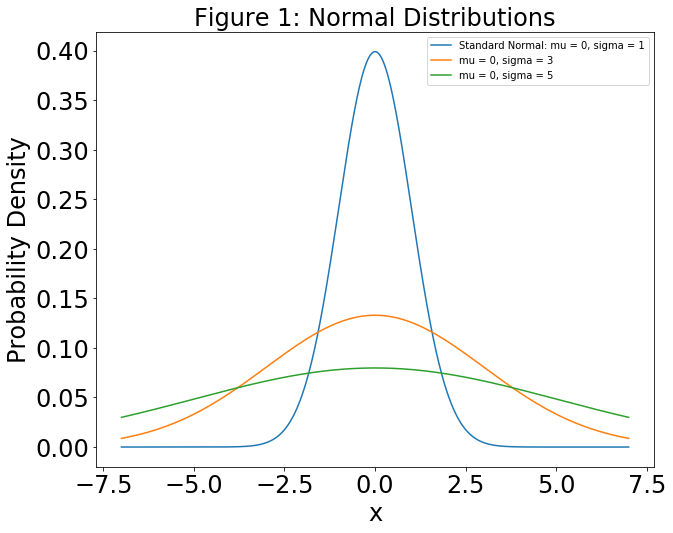

In [20]:
fig, ax = plt.subplots(1,1)
x = np.linspace(-7,7,100000)
ax.plot(x,stats.norm.pdf(x,0,1), label = 'Standard Normal: mu = 0, sigma = 1')
ax.plot(x,stats.norm.pdf(x,0,3), label = 'mu = 0, sigma = 3')
ax.plot(x,stats.norm.pdf(x,0,5),label = 'mu = 0, sigma = 5')
plt.title("Figure 1: Normal Distributions",size = 24)
leg = ax.legend()
plt.xlabel('x',size = 24)
plt.ylabel('Probability Density',size = 24)
plt.tick_params(labelsize = 24)
plt.show()

A pdf is a function that is intended to be integrated. The value at a given $x$ does not tell you the probability of measuring $x$ -- rather, the integral from $x_1$ to $x_2$ will tell you the probability of measuring a value that lies between $x_1$ and $x_2$:

<br>

<center>$\int_{x_1}^{x_2} pdf(x)\hspace{2mm} dx = $ Probability of measuring value between $x_1$ and $x_2$.</center>
    

This is a result of the fact that $x$ is a continuous variable so the set of possible measurements is too dense to ask about the probability at one particular value of $x$. We can only ask about the probability of making a measurement in some interval (or union of intervals).

## 1.2 The Cumulative Distribution Function

Now, if $x$ has the standard normal distribution as its pdf, and for each $x$ we ask the question: *what is the probability of getting a value less than $x$?*, then we must integrate from $-\infty$ to $x$ for every possible $x$. Thus we define a new function:

$$cdf(x) = \int_{-\infty}^{x} pdf(x) \hspace{2mm} dx$$.

We call $cdf(x)$ the **cumulative distribution function**, and its value at a given $x$ represents the probability of getting a measurement less than or equal to $x$.

In Python, we can call the function *stats.norm.cdf(x)* and it will return the probability of getting a measurement less than or equal to $x$, given that $x$ has the standard normal distribution ($\mu=0, \hspace{2mm} \sigma=1$) as its pdf. Let us try a few examples:

In [21]:
A = stats.norm.cdf(-2)
B = stats.norm.cdf(0)
C = stats.norm.cdf(2)

print("cdf(-2) = ", A)
print("cdf(0) = ",B)
print("cdf(2) = ",C)

cdf(-2) =  0.022750131948179195
cdf(0) =  0.5
cdf(2) =  0.9772498680518208


Hence, if $x$ has the standard normal distribution, we find that the probability of measuring $-2$ or less is $2.2 \% $, the probability of measuring $0$ or less is $50.0 \%$, and the probability of measuring $2$ or less is $97.7 \%$.

In general, if $x$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, we can call the function *stats.norm.cdf(x, loc = $\mu$, scale = $\sigma$)* to give us the probability of measuring $x$ or less, where $x$ is normally distributed with parameters $\mu$ and $\sigma$.

Note that because the standard normal distribution is defined to have a mean of zero and a standard deviation of one, asking *what is the probability of measuring something at 2 or less?* is equivalent to asking *what is the probability of measuring something at $\mu + 2\sigma$ or less?*. 

So let us consider the example below, where we allow the average and standard deviation to vary from the standard distribution, but our $x$ is expressed as the distance, in units of standard deviation, away from the mean: $x = \mu + n\sigma$, where $n \in \mathbb{R}$.

In [38]:
mu = 1 #average
sigma = 2 #standard deviation

A2 = stats.norm.cdf(mu - 2*sigma,loc = mu, scale = sigma) #x = mu -2*sigma
B2 = stats.norm.cdf(mu, loc = mu, scale = sigma) #x = mu
C2 = stats.norm.cdf(mu + 2*sigma, loc = mu, scale = sigma) #x = 2*sigma

print("cdf(\u03BC - 2\u03C3) =", A2)
print("cdf(\u03BC) =",B2)
print("cdf(\u03BC + 2\u03C3) =",C2)

cdf(μ - 2σ) = 0.022750131948179195
cdf(μ) = 0.5
cdf(μ + 2σ) = 0.9772498680518208


These are precisely the values we obtained above when we called *stats.norm.cdf(x)* : the value of *norm.cdf(x,$\mu$,$\sigma)$* depends only on the distance of $x$ away from the mean, in units of standard deviation. This is one reason why the standard normal distribution is so useful: we simply have to call *norm.cdf(n)* and the output will tell us the probability of measuring a value less than $\mu + n\sigma$, **for any $\mu$ or $\sigma$**.

## 1.3 The Percent Point Function

Instead of asking *what is the probability of measuring $x$ or less?*, we often ask the inverse:

<br>
    <center><i>If the probability to measure a value less than some threshold $x$ is known, what is the threshold $x$? </i></center>
    
This is where the **percent point function (ppf)** comes in. The percent point function takes as input the probability of making a measurment below some threshold; it will return the value of that threshold. So the ppf is precisely the inverse function of the cdf: $(ppf \circ cdf)(x) = (cdf \circ ppf)(x) = x$.

We showed in section 1.2 that *norm.cdf(x,$\mu$,$\sigma$)* for normal distributions with any $\mu$ or $\sigma$ depends only on $n$ where $x = \mu + n\sigma, \hspace{2mm} n\in \mathbb{R}$. Hence we need only look at the standard normal distribution and call *stats.norm.ppf(q)* where $q$ is the probability of making a measurement below some threshold; the value returned represents how far the threshold is from the mean in units of standard deviation, for any normal distribution characterized by any $\mu,\sigma$.

since the actual value of the threshold $x$ is $x = \mu + (stats.norm.ppf(q))\hspace{1mm} \sigma$, we see that a negative value returned by *stats.norm.ppf(q)* means that the threshold for that given probability is below the mean.

Below we calculate *stats.norm.ppf* using the values we obtained in section 1.2 line 28:

In [23]:
A3 = stats.norm.ppf(0.02275)
B3 = stats.norm.ppf(0.5)
C3 = stats.norm.ppf(0.9772)

print("ppf(2.27%) = ", A3)
print("ppf(50%) = ", B3)
print("ppf(97.7%) = ", C3)

ppf(2.27%) =  -2.0000024438996036
ppf(50%) =  0.0
ppf(97.7%) =  1.9990772149717693


As expected, ppf has returned values that match results from section 1.2

# Part 2: Investigating Rayleigh Distribution

In this section we will introduce the concepts of **background distributions** and the **significance of measurements** as we consider a new distribution: the Rayleigh distribution.

## 2.1 The Probability Density Function

Let $y$ and $z$ be continuous random variables that are normally distributed (see section1.1), both having a mean of 0 and a standard deviation of $\sigma$.

If $y$ and $z$ are uncorrelated then $x = \sqrt{y^2+z^2}$ is also a continuous random variable, and it is said to be Rayleigh distributed; its probability density function is:

$$f(x) = \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}}, \hspace{2mm} x\geq0.$$

$\sigma$ is called the scale parameter and it is the standard deviation of $y$ and $z$. Below we disply plots of Rayleigh Distributions with different scale parameters and observe what happens:

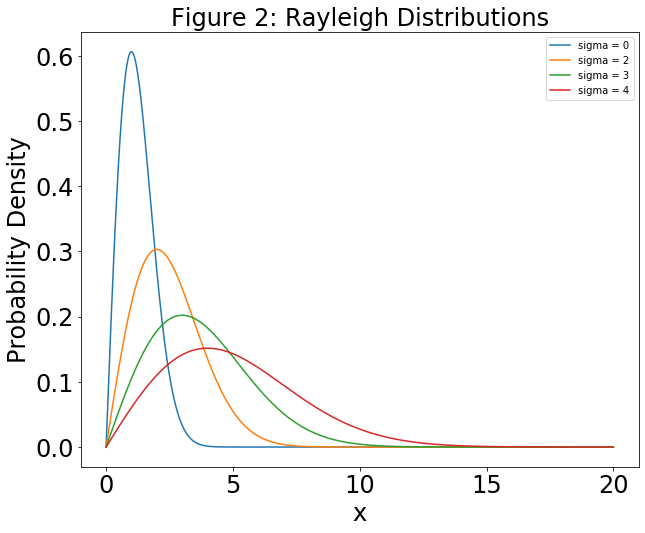

In [24]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0,20,100000)
ax.plot(x,stats.rayleigh.pdf(x),label = 'sigma = 0')
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 2),label = 'sigma = 2')
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 3), label = 'sigma = 3')
ax.plot(x,stats.rayleigh.pdf(x,loc = 0,scale = 4), label = 'sigma = 4')
plt.title("Figure 2: Rayleigh Distributions",size = 24)
leg = ax.legend()
plt.xlabel('x',size = 24)
plt.ylabel('Probability Density',size = 24)
plt.tick_params(labelsize = 24)
plt.show()

We see that as $\sigma$ increases, the maximum of the probability distribution shifts to the right and the entire function spreads. This makes sense because $\sigma$ represents the standard deviation of $y$ and $z$, so as the spread in $y$ and $z$ gets larger the spread of $x = \sqrt{y^2 + x^2}$ should also get larger. Additionally, $x$ can be thought of as the length of a vector whose components each follow a normal distribution centered at zero; if the spread in the components of the vector becomes larger, the most likely length of the vector should get bigger since higher values of the components have gained probability while smaller values have lost probability (see Figure 1 in section 1.1).

Below we plot a histogram of measurements made of a variable that follows a Rayleigh distribution with $\sigma$ = 1.
100,000 measurements are made, and the analytic function is superimposed.

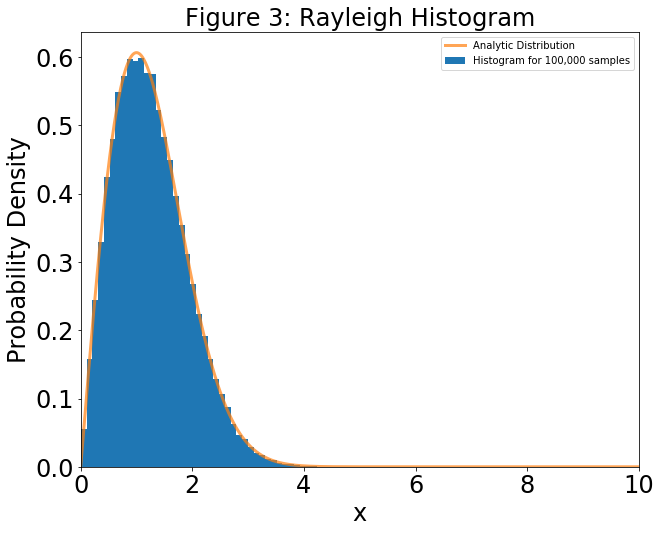

In [25]:
d = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50,density=True, label = 'Histogram for 100,000 samples')
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
x = np.linspace(0,10,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 1),linewidth = 3,alpha = 0.7, label = 'Analytic Distribution')
plt.title("Figure 3: Rayleigh Histogram",size = 24)
leg = ax.legend()
plt.xlabel('x',size =24)
plt.ylabel('Probability Density', size = 24)
plt.show()

## 2.2 Example of Rayleigh Distribution and Analysis

Let us now walk through an example where the no-signal data -- referred to as the **background data** -- follows a Rayleigh distribution and how we may analyze the signifiance of a measurment.

Suppose we want to measure the speed of ocean current vectors in 2 dimensions. Defining the component directions $y$ and $z$ to be orthogonal spatial directions, and assuming the speeds in each of the component are normally distributed about 0 with the same standard deviatation $\sigma$, then the length measurement of the current vectors in the $yz$-plane will follow a Rayleigh distribution with scale parameter $\sigma$. Let us consider a Rayleigh distribution with $\sigma = 2$mph:

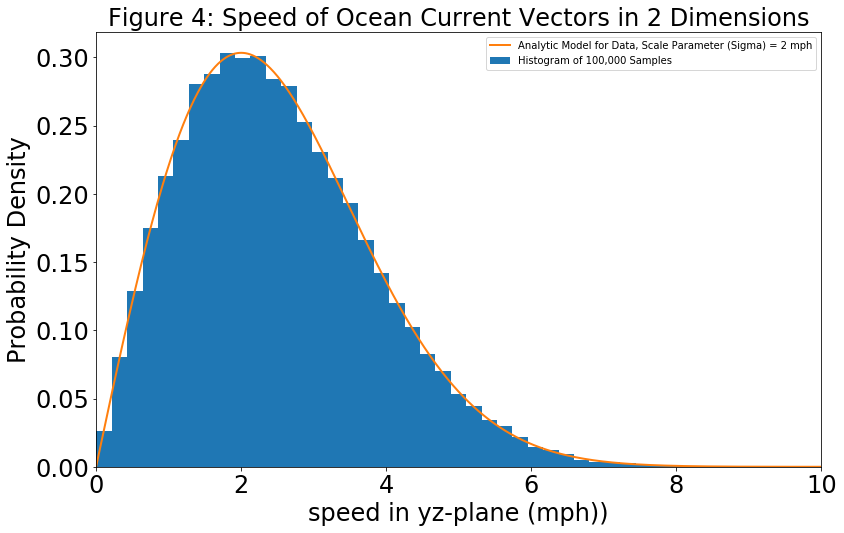

In [42]:
d = stats.rayleigh.rvs(loc = 0, scale = 2, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50,density=True, label = 'Histogram of 100,000 Samples')
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
x = np.linspace(0,10,1000)
plt.title("Figure 4: Speed of Ocean Current Vectors in 2 Dimensions",size = 24)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 2),linewidth = 2,alpha = 1, label = 'Analytic Model for Data, Scale Parameter (Sigma) = 2 mph')
leg = ax.legend()
plt.xlabel('speed in yz-plane (mph))',size =24)
plt.ylabel('Probability Density', size = 24)
plt.show()

Now that we have the background measured, suppose we make a new measurment and find that the speed of the current vector is 7 miles per hour. We now want to ask:

<br>
<center><i>What is the probability that my background gave me a signal at 7mph or higher speed? Furthermore, if my background were normally distributed, how far away, in units of standard deviation (&sigma;)*, would the signal have to be from the mean in order to produce the same probability?</i></center>
<br>
<center>*note that in this part of the question, &sigma; refers to the standard deviation of the hypothetical normal distribution and NOT the scale parameter for the Rayleigh distribution.</center>
    <br>

Recall from section 1.1 that in order to calculate the probability of a distribution producing a signal between $x_1$ and $x_2$ we must integrate the probabibility distribution function from $x_1$ to $x_2$. Hence, in order to answer the first part of the question above, we must perform the integral:
$$Probability \hspace{1mm}(speed \geq 7mph) = \int_{7}^{\infty} \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}} \hspace{2mm} dx$$

Now recall that 
*stats.rayleigh.cdf(x, loc = 0, scale = $\sigma$)* = $\int_{0}^{x} \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}} \hspace{2mm} dx$, where the integral starts at $0$ instead of $-\infty$ since a Rayleigh distribution is only defined for $x \geq 0$. Hence:

$$\int_{7}^{\infty} \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}} \hspace{2mm} dx = \int_{0}^{\infty} \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}} \hspace{2mm} dx - \int_{0}^{7} \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}} \hspace{2mm} dx = $$

$$1 - stats.rayleigh.cdf(7, \hspace{1mm} loc = 0,\hspace{1mm} scale = \sigma)$$
    

So to answer the first part of the question, we must call the following function in Python:

In [27]:
# calculating the 
# probability of Rayleigh background with scale parameter = 2 producing a signal of 7mph or higher speed:

prob7sig2 = 1 - stats.rayleigh.cdf(7,loc=0,scale = 2)
print("Probability(x >= 7) = ", prob7sig2)

Probability(x >= 7) =  0.0021874911181828383


Therefore, the answer to the question *What is the probability that my background gave me a signal at 7mph or higher speed?* is:
<br>
<br>
<center><i>the probability of the background producing a current vector with speed 7mph or greater is 0.219 &percnt;</i></center>.

We now want to look at the second part of the question: *if my background were normally distributed, how far away from the mean, in units of $\sigma$, would the threshold of signal-like measurements have to be in order to produce the same probability?* **Note that $\sigma$ is the standard deviation of the hypothetical normal distribution; it is NOT the scale parameter of the actual Rayleigh distribution.**

In this case, '*signal-like measurements*' are current vectors with large lengths; that is, we are looking for a value $n \in \mathbb{R}$ such that:

$$ \int_{n\sigma}^{\infty} \frac{1}{2 \pi \sigma ^2} e^{-\frac{(x-\mu)^2}{2 \sigma ^2}} \hspace{1mm} dx = 0.00219$$

Recall from section 1.1 that we can simply look at the standard normal distribution and set $\mu = 0, \sigma = 1$ so that the above integral becomes $ \int_{n}^{\infty} \frac{1}{2 \pi} e^{-\frac{x^2}{2}} \hspace{1mm} dx$.

Similar to the arguments below Figure 3, if our background were normally distributed and we were looking for the probability of signal-like measurements, we would have been looking for $\alpha$ = *1 - stats.norm.cdf(threshold)* because signal-like measurments are current vectors with large lengths. But the question above is the inverse of this question. Thus, we want to call the inverse of the function $\alpha(x) = 1 - stats.norm.cdf(x)$. Observe that $\alpha^{-1}(x) = stats.norm.ppf(1-x)$:

$$1-stats.norm.cdf((stats.norm.ppf(1-x))) = 1-(1-x) = x,$$

where we have used the fact that *stats.norm.cdf(x)* is the inverse of *stats.norm.ppf(x)*.

Thus, to answer the second part of the question we must call the following function in Python:

In [28]:
#calculating the threshold of signal-like measurments, in units of sigma away from the mean,
#if the probability of obtaining a signal-like measurment is 0.219% and the background is normally distributed

threshold = stats.norm.ppf(1 - 0.00219) # see line 109 for how we calculated 0.00219 probability
print("n = ",threshold, "(see integral above for definition of n)")

n =  2.849412875835001 (see integral above for definition of n)


Therefore, we see that if our background were normally distributed, the threshold of signal-like measurments would have to be $2.85\sigma$ (2.85 standard deviations) to the right of the mean in order for the background to have a $0.219\%$ probability of producing a signal-like measurement (a vector with length greater than 7mph in this case).

We thus refer to our measurement of 7mph as **having a significance of 2.85$\sigma$** (Again, $\sigma$ refers to the standard deviation in normal distributions). Note that the sign of the signifcance tells us whether the threshold needs to be above (+) or below (-) the mean.

## 2.3 Looking at Different Signal Types

In the above example, we let our original measurement fall in a fairly unlikely region of our background distribution, and then defined *signal-like* measurments to be any measurement at or above that threshold. Let us now consider what happens if our measurment falls in a different region of our background distribution or if we define our *signal-like* measurments to be below our threshold. For simpliciy we keep the same distriubtion as above: Rayleigh with a scale parameter 2. For ease of viewing we reprint Figure 4 below:

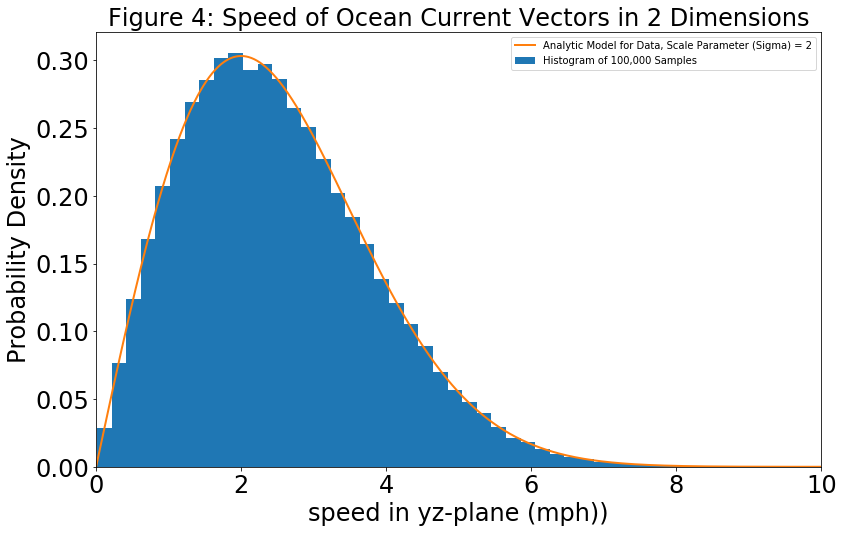

In [44]:
d = stats.rayleigh.rvs(loc = 0, scale = 2, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50,density=True, label = 'Histogram of 100,000 Samples')
plt.tick_params(labelsize = 24)
plt.xlim([0,10])
plt.title("Figure 4: Speed of Ocean Current Vectors in 2 Dimensions",size = 24)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 2),linewidth = 2,alpha = 1, label = 'Analytic Model for Data, Scale Parameter (Sigma) = 2')
leg = ax.legend()
plt.xlabel('speed in yz-plane (mph))',size =24)
plt.ylabel('Probability Density', size = 24)
plt.show()

### 2.3.1 Measurement Falls in High Probability Region of Background

Suppose our measurment returns a vector of length 3 miles per hour. Keeping our defintion of signal-like measurments the same, we repeat the process in section 2.2 in order to obtain the significance of our result.

In [30]:
# calculating the 
# probability of Rayleigh background with scale parameter = 2 producing a signal of 3mph or higher speed:
prob3sig2 = 1 - stats.rayleigh.cdf(3,loc=0,scale = 2)
print("Probability(x >= 3) = ", prob3sig2)

#calculating the threshold of signal-like measurments, in units of sigma away from the mean,
#if the probability of obtaining a signal-like measurment is prob3sig2 and the background is normally distributed
threshold = stats.norm.ppf(1 - prob3sig2)

print("significance = ",threshold,'\u03C3')

Probability(x >= 3) =  0.32465246735834974
significance =  0.454727999525734 σ


In contrast to our analysis in section 2.2, we see that because the background is much more likely to produce a signal-like measurement in this scenario, its significance corresponds to a smaller positive $\sigma$ value; that is, if the background were normally distributed, the threshold of signal-like measurments would be closer to the mean than our results in section 2.2, but it must still be above the mean. this makes sense since we are integrating toward the right of our threshold: if our signifcance were negative (below the mean) then we should expect a probability of greater than 50% since we are integrating to the right.

### 2.3.2 Signal-Like Measurements Corresponds to Low-Speed Vectors

Suppose our measurement returns a vector of length 7 miles per hour, as in section 2.2, but now our definition of signal-like measurements are vectors with speeds less than or equal to 7 miles per hour. We repeat the process in section 2.2 but instead of calling *1 - stats.rayleigh.cdf*  we will simply call the function *stats.rayleigh.cdf* since we are integrating from below. (see section 1.2 for discussion on cdf). Similary, we will call *stats.norm.ppf(q)* instead of *stats.norm.ppf(1-q)* because we need the inverse of *cdf* not *1-cdf*.

In [45]:
# calculating the 
# probability of Rayleigh background with scale parameter = 2 producing a signal of 7mph or lower speed:
prob7sig2below = stats.rayleigh.cdf(7,loc=0,scale = 2)
print("Probability(x <= 7) = ", prob7sig2below)

#calculating the threshold of signal-like measurements, in units of sigma away from the mean,
#if the probability of obtaining a signal-like measurement is prob7sig2below and 
#the background is normally distributed
threshold2 = stats.norm.ppf(prob7sig2below)

print("significance = ",threshold2,'\u03C3')

Probability(x <= 7) =  0.9978125088818172
significance =  2.849777501782421 σ


If we look at the graph above we can clearly see that it's very likely for our background to produce signals in the range $0\leq x \leq 7$. Since we are integrating from the left of our threshold, and the probability we obtained is very close to 1, we should expect our significance to be a positive number of standard deviations away from the mean. This is indeed the case.

### 2.3.3 Signal is a Low-Speed vector and Signal-Like Measurements Correspond to Low-Speed Vectors

Let our measurement be 0.5 mile per hour and our definition of signal-like measurements be vectors with speeds less than or equal to 0.5 miles per hour. This scenario is very similar to the case we saw in section 2.2 in that the total probability of our background producing such measurements is pretty small (see Figure 4). Let's take a look at what happens to the sign of our significance:

In [32]:
# calculating the 
# probability of Rayleigh background with scale parameter = 2 producing a signal of 0.5 mph or lower speed:
prob05sig2below = stats.rayleigh.cdf(0.5,loc=0,scale = 2)
print("Probability(x <= 0.5) = ", prob05sig2below)

#calculating the threshold of signal-like measurements, in units of sigma away from the mean,
#if the probability of obtaining a signal-like measurement is prob7sig2below and the background is normally distributed
threshold3 = stats.norm.ppf(prob05sig2below)

print("significance = ",threshold3,'\u03C3')

Probability(x <= 0.5) =  0.030766765523655912
significance =  -1.8696421274196886 σ


We see that the sign of our significance has become negative. This means that if our background were normally distributed, the threshold of signal-like data would have to be almost 2 standard deviations to the left of the mean. Again, this makes sense since we are integrating the functions from left of our threshold, and our calculated probability is less than 50%.

# Part 3: The Poisson Distribution

In this section we consider a discrete probability distribution and analyze a sample data set.

## 3.1 Defintion and Plots

The Poisson Distribution occurs when we measure the number of instances an event occurs in specified interval of time. The type of event we are counting must follow these assumptions in order for the distribution to be Poisson:

1. The event can occur $k$ number of times in an interval where $k \in \mathbb{N}$.
2. the average rate is constant
3. The events are independent of one another
4. only one event can occur at a single instant
5. The actual probability distribution is binomial but we are looking at rare events

If the type of event matches the above conditions, and if we fix an interval of time, then the probability of measuring $k$ events in that interval is given by the Poisson Distribution:

$$P(k\space events\space occuring \space in\space an\space interval) = \frac{\lambda^k e^{-\lambda}}{k!},$$
where $\lambda$ is the average number of events per interval, and $P(k)$ is only defined for $k = 0, 1, 2...$

Note that although an integer number of events must occur in an interval, $\lambda$ need not be an integer because it is an average. $\lambda$ is a continuous variable since it is not a measurement of discrete events but a result of a mathematical operation whose image is in the reals.

Below we have plotted several Poisson distributions with different values of $\lambda$:

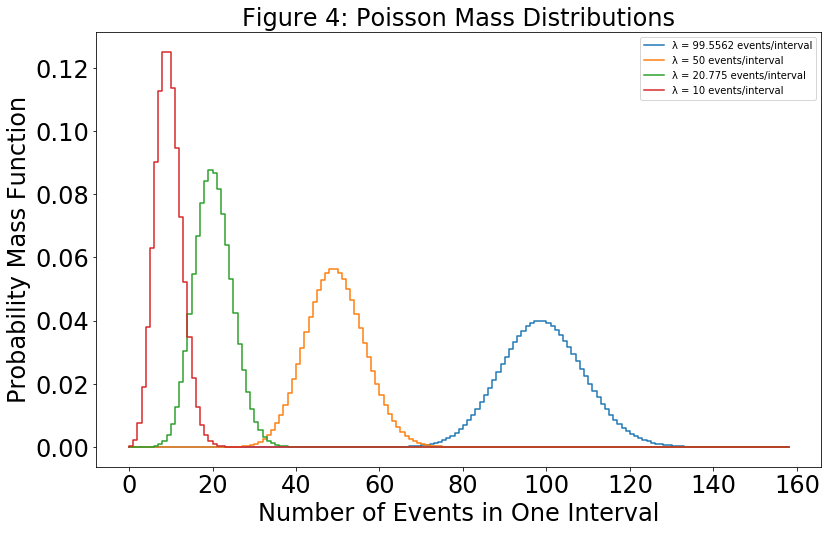

In [33]:
plt.rcParams["figure.figsize"] = (13,8)
fig, ax = plt.subplots(1,1)
x = np.arange(0,159,1)
ax.step(x,poisson.pmf(x,99.5562),label = '\u03bb = 99.5562 events/interval')
ax.step(x,poisson.pmf(x,50),label ='\u03bb = 50 events/interval')
ax.step(x,poisson.pmf(x,20.775),label = '\u03bb = 20.775 events/interval')
ax.step(x,poisson.pmf(x,10),label = '\u03bb = 10 events/interval')

plt.title("Figure 4: Poisson Mass Distributions",size = 24)
leg = ax.legend()
plt.xlabel('Number of Events in One Interval',size = 24)
plt.ylabel('Probability Mass Function',size = 24)
plt.tick_params(labelsize = 24)
plt.show()

Note that for discrete distributions we refer to their probability functions as 'Mass Distributions". As opposed to continuous distributions, since we are dealing with a discrete variable $k$, it makes sense to ask for the probability *at* $k$ -- so we refer to the distribution as a mass distribution. 

We see that as $\lambda$ (the average number of events in an interval) increases, the entire distribution shifts to the right. In fact, the distribution is centered about $\lambda$ and is symmetric about the $\lambda$. (Note that if the average rate is not an integer then the mass function is not actually defined at $\lambda$). This makes sense because if the average rate is to be constant we should expect that for a large set of measurements there are just as many instances below the average as there are above. (We discuss what happens when the rate approaches one in the following paragraphs).

Also note that the spread increases. This makes sense because as the average rate increases, there are more possibilities for making a measurement that can be characterized as 'below the average rate'; since a constant rate implies that the distribution should be symmetric we see the entire distribution spread as the average rate increase.

Also note that the height of the distribution decreases as $\lambda$ increases. This is because the total probability must sum to one, so if the spread increases the heights must decrease.

What happens if our average rate is small and approaches one? Let's take a look:

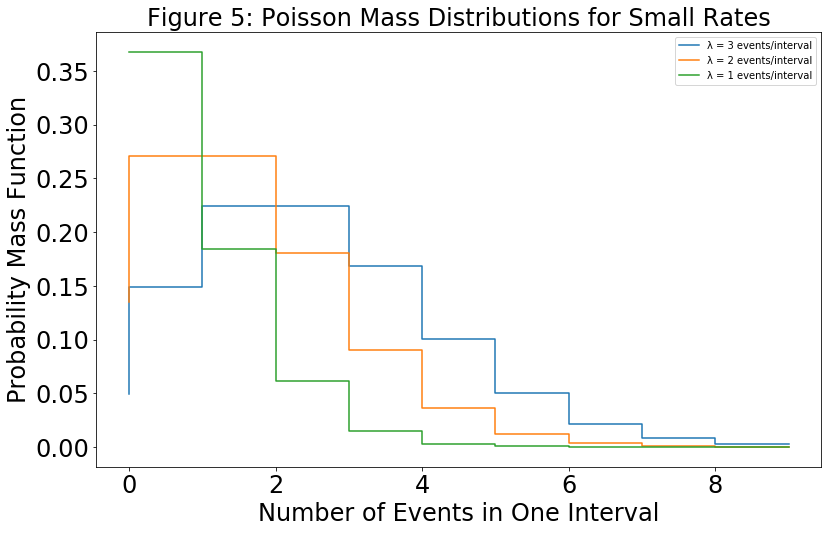

In [34]:
plt.rcParams["figure.figsize"] = (13,8)
fig, ax = plt.subplots(1,1)
x = np.arange(0,10,1)
ax.step(x,poisson.pmf(x,3),label = '\u03bb = 3 events/interval')
ax.step(x,poisson.pmf(x,2),label ='\u03bb = 2 events/interval')
ax.step(x,poisson.pmf(x,1),label = '\u03bb = 1 events/interval')

plt.title("Figure 5: Poisson Mass Distributions for Small Rates",size = 24)
leg = ax.legend()
plt.xlabel('Number of Events in One Interval',size = 24)
plt.ylabel('Probability Mass Function',size = 24)
plt.tick_params(labelsize = 24)
plt.show()

Here we see that as the rate gets smaller the probability mass functions 'bunch up' near zero and one: the distribution is no longer symmetric. This makes sense because the number of events cannot be less than zero, so as the rate approaches one we lose ways in which we can 'measure below the mean' so the distribution must bunch up near zero and one.

## 3.2 Example of Poisson Distribution and Analysis

Suppose someone flips a coin once per day and they find the rate of getting 'Heads' to be 3.5 Heads/week. Suppose we want to find the probability of getting $k$ 'Heads' in a week. Then:

1. Only 0,1,2,... flips can happen during any interval of time
2. the average rate is constant
3. each flip is independent of any other flip
4. only one flip can occur at a single instant
5. the actual distribution of a coin toss yielding 'Heads' is binomial

Hence we can assume that counting the number of 'Heads' in a week  will produce a Poisson Distribution.

In this case, the average rate is 3.5 Heads/week. We plot the mass distribution below:

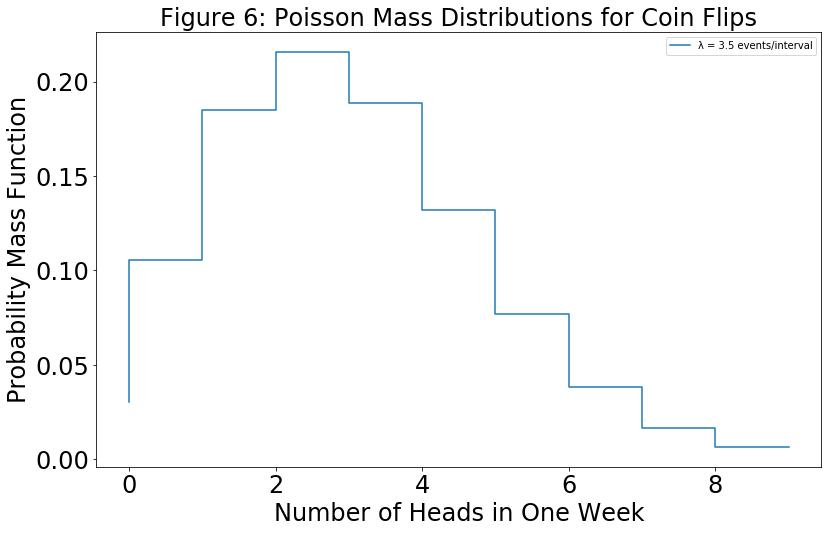

In [35]:
plt.rcParams["figure.figsize"] = (13,8)
fig, ax = plt.subplots(1,1)
x = np.arange(0,10,1)
ax.step(x,poisson.pmf(x,3.5),label = '\u03bb = 3.5 events/interval')
plt.title("Figure 6: Poisson Mass Distributions for Coin Flips",size = 24)
leg = ax.legend()
plt.xlabel('Number of Heads in One Week',size = 24)
plt.ylabel('Probability Mass Function',size = 24)
plt.tick_params(labelsize = 24)
plt.show()

Now, suppose that in a given week we find that we get 7 heads. We ask: 
<br>
<br>
<center><i>What is the probability that my background Poisson distribution would give me a measurment of 7 heads or more? Furthermore, if my background were normally distributed, how far away, in units of standard deviation (&sigma;), would the measurement have to be from the mean in order to produce the same probability?</i></center>
<br>
<br>

Since our Poisson distribution is discrete we replace our integrals with sums:

$$P(k\geq 7) = \sum_{k=7}^{k=\infty} \frac{\lambda^k e^{-\lambda}}{k!}$$


Fortunately, Python has a *poisson.cdf()* function for the Poisson distribution just as it does for the analytic functions we viewed above. Following the steps outlined in section 2.2, we calculate the answers to our above questions:

In [46]:
#add up all the probabilities for k>= 7

prob7above = 1 - stats.poisson.cdf(7,3.5)
print("Probability(k >= 7) = ", prob7above)

#calculate the associated sigma

threshold4 = stats.norm.ppf(1 - prob7above)
print("threshold = ", threshold4, '\u03C3')

Probability(k >= 7) =  0.026738922091319672
threshold =  1.9310421170807273 σ


It is interesting to note that because our background is discrete, we now have a **discrete set of n $\sigma$ that are possible significances**. That is, because we have a step function for our background probability mass function, we now have a countable set of possible threshold values rather than a continuous set.

In [2]:
!jupyter nbconvert --to html Phys434_lab1_thalyapaleologu.ipynb

[NbConvertApp] Converting notebook Phys434_lab1_thalyapaleologu.ipynb to html
[NbConvertApp] Writing 802462 bytes to Phys434_lab1_thalyapaleologu.html
